# Scikit_learn 모듈 맛보기
- iris 분류 프로그램 만들어보기

### 1. 데이터 받아오기 및 전처리


In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()


In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
iris.keys()  # 이 iris는 딕셔너리 구조를 가지고 있음!

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
# feature data => 모델의 X에 들어갈 데이터 + numpy dimensional arrya
print(iris.data[:5])
type(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


numpy.ndarray

In [19]:
# feature_names => 위 data의 각 원소가 어떤 feature을 의미하는지를 보여줌
print(iris.feature_names)
type(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


list

In [21]:
import pandas as pd
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
# train-test용 데이터프레임 만들기
feature_names=[name[:-5] for name in iris.feature_names]  # 뒤에 단위를 날리기 위한 코드
df=pd.DataFrame(iris.data, columns=feature_names)
df['target']=iris.target   # 이게 모델에서 y에 들어갈 데이터들
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
import numpy as np
np.unique(iris.target, return_counts=True)  # target이 어떤 데이터로 이루어져 있는지, 분포는 어떤지 확인하는 코드
# 결과값을 보면 iris.target은 0,1,2의 값을 가지고 각 데이터의 빈도수는 50으로 동일함을 알 수 있음

(array([0, 1, 2]), array([50, 50, 50]))

In [26]:
# 전체 데이터에 대한 설명 확인
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [27]:
df.groupby('target').describe()  # 각 품종별 기초통계량 확인

sepal length                                             sepal width  \
              count   mean       std  min    25%  50%  75%  max       count   
target                                                                        
0              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8        50.0   
1              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0        50.0   
2              50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9        50.0   

               ... petal length      petal width                             \
         mean  ...          75%  max       count   mean       std  min  25%   
target         ...                                                            
0       3.428  ...        1.575  1.9        50.0  0.246  0.105386  0.1  0.2   
1       2.770  ...        4.600  5.1        50.0  1.326  0.197753  1.0  1.2   
2       2.974  ...        5.875  6.9        50.0  2.026  0.274650  1.4  1.8   

                       
        50%  75%  max  
target                 
0       0.2  0.3  0.6  
1       1.3  1.5  1.8  
2       2.0  2.3  2.5  

[3 rows x 32 columns]

In [29]:
df.groupby('target').agg(['mean', 'std'])
# 여러개의 함수를 여러 열에 적용 : agg()함수

sepal length           sepal width           petal length            \
               mean       std        mean       std         mean       std   
target                                                                       
0             5.006  0.352490       3.428  0.379064        1.462  0.173664   
1             5.936  0.516171       2.770  0.313798        4.260  0.469911   
2             6.588  0.635880       2.974  0.322497        5.552  0.551895   

       petal width            
              mean       std  
target                        
0            0.246  0.105386  
1            1.326  0.197753  
2            2.026  0.274650

In [33]:
import matplotlib.pyplot as plt
setosa = df[ df['target']==0 ].iloc[:, :-1]
setosa.shape

(50, 4)

In [35]:
setosa.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


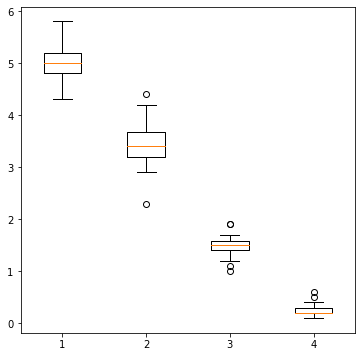

In [40]:
plt.figure(figsize=(6,6))
plt.boxplot(setosa.T)
plt.show()

### 2. 학습과 테스트 데이터로 분리

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_Test, y_train, y_test=train_test_split(
    iris.data, iris.target, random_state=2021   # 일반적으로 train:test 비율이 3:1로 할당됨
)
X_train.shape, X_Test.shape, y_train.shape, y_test.shape  # 일반적으로 2차원 데이터는 대문자, 1차원 데이터는 소문자로 씀

((112, 4), (38, 4), (112,), (38,))

In [46]:
# 데이터 쏠림 현상이 있는지 확인하는 과정(y label 쏠림이 있으면 좋지 않음)
np.unique(y_train, return_counts=True)  # 결과값을 보면 label이 조금 쏠려있음을 확인 가능

(array([0, 1, 2]), array([37, 38, 37]))

In [47]:
# y값을 균등하게 뽑기 위해서는 stratify 옵션을 사용해야 함.
X_train, X_Test, y_train, y_test=train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=2021   # 일반적으로 train:test 비율이 3:1로 할당됨
)
X_train.shape, X_Test.shape, y_train.shape, y_test.shape  # 일반적으로 2차원 데이터는 대문자, 1차원 데이터는 소문자로 씀

((112, 4), (38, 4), (112,), (38,))

In [48]:
# 데이터 쏠림 현상이 있는지 확인하는 과정(y label 쏠림이 있으면 좋지 않음)
np.unique(y_train, return_counts=True)  # 결과값을 보면 label이 균일하게 분포되어 있음을 확인 가능

(array([0, 1, 2]), array([37, 37, 38]))

In [49]:
# test size의 비율을 변경하기
X_train, X_Test, y_train, y_test=train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.2, random_state=2021   # 이렇게 하면 80:20의 비율로 데이터가 할당됨
)
X_train.shape, X_Test.shape, y_train.shape, y_test.shape  # 일반적으로 2차원 데이터는 대문자, 1차원 데이터는 소문자로 씀

((120, 4), (30, 4), (120,), (30,))

### 3. 모델 학습

#### 3-1 결정 트리(Decision Tree)

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
# 모델 생성 => 객체 생성과 동치
dtc=DecisionTreeClassifier(random_state=2022)  # 이렇게 객체를 생성하고 함수를 할당함으로 모델이 생성됨. 괄호 안에 여러 값들을 넣어줄 수 있는데 이 값들을 Hyperparameter라고 부름

In [54]:
# 모델의 Hyperparameter 확인
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [55]:
# 모델 훈련
dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=2022)

##### 4. 예측

In [57]:
pred_dt=dtc.predict(X_Test)

In [60]:
res=pd.DataFrame({'y':y_test, 'DT':pred_dt})
res

,y,DT
0,0,0
1,1,1
2,1,2
3,2,2
4,0,0
5,1,1
6,0,0
7,1,1
8,2,2
9,0,0


##### 5. 평가

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dt)

0.9

In [64]:
# 4, 5번을 한번에 수행하는 코드
dtc.score(X_Test, y_test)

0.9

#### 3-2 Support Vector Machine(SVM)

In [65]:
# 모델 생성 및 학습
from sklearn.svm import SVC
svc=SVC(random_state=2022)
svc.fit(X_train, y_train)

SVC(random_state=2022)

##### 4. 예측



In [70]:
pred_sv=svc.predict(X_Test)
res=pd.DataFrame({'y':y_test, 'svm':pred_sv})
res.head()

,y,svm
0,0,0
1,1,1
2,1,1
3,2,2
4,0,0


##### 5. 평가

In [69]:
accuracy_score(y_test, pred_sv)

0.9

#### Logistic Regression

In [84]:
# 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
lrc= LogisticRegression(random_state=2022, max_iter=500)
lrc.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=2022)

##### 4. 예측

In [85]:
pred_lr=lrc.predict(X_Test)
res=pd.DataFrame({'y':y_test, 'lrc':pred_lr})
res.head()

,y,lrc
0,0,0
1,1,1
2,1,1
3,2,2
4,0,0


##### 5. 평가

In [86]:
accuracy_score(y_test, pred_lr)

0.9333333333333333

In [77]:
lrc2=LogisticRegression(random_state=2022)
lrc2.fit(X_train, y_train)
# 이렇게 하면 반복 횟수(max_iter값)이 너무 낮아서 에러 발생

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=2022)

In [78]:
from sklearn.preprocessing import MinMaxScaler  # 일종의 정규화 모델(각 독립변수들을 동일한 스케일로 바꿔줌)
iris_scaled=MinMaxScaler().fit_transform(iris.data)

In [79]:
iris_scaled[:5]  # 모든 열의 데이터가 0~1 사이의 데이터로 바뀌었음을 확인 가능

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [88]:
X_train2, X_test2, y_train2, y_test2 =train_test_split(   
    iris_scaled, iris.target, stratify=iris.target, test_size=0.2, random_state=2022
)  
lrc2=LogisticRegression(random_state=2022)
lrc2.fit(X_train2, y_train2)

LogisticRegression(random_state=2022)

In [89]:
pred_lr2=lrc.predict(X_test2)
accuracy_score(y_test2, pred_lr2)

0.3333333333333333

#### 세 모델 비교

In [92]:
dtc.score(X_Test, y_test), svc.score(X_Test, y_test), lrc.score(X_Test, y_test)

(0.9, 0.9, 0.9333333333333333)

In [97]:
res=pd.DataFrame({'y':y_test, 'lrc':pred_lr})
res['SV']=pred_sv
res['LR']=pred_lr
res.head()

,y,lrc,SV,LR
0,0,0,0,0
1,1,1,1,1
2,1,1,1,1
3,2,2,2,2
4,0,0,0,0
